In [1]:
import pandas as pd

##not using these lines, but you can if you want to use google drive. you would have to change the path of the xlsx files below, too.
# from google.colab import drive

# drive.mount('/content/drive')

# put your files in the main folder of google drive for this to work

In [4]:
x = pd.read_excel('Kingston-Precipitation-1900-2014.xlsx')

labels = ['Year',
          'January', 'February', 'March', 
          'April', 'May','June',
          'July','August','September',
          'October','November','December']

a = x[:-18] #removes metadata at end
a1 = a / 2.54 #makes second table of precipitation as inches

b = a.set_axis(labels, axis=1, inplace=False) #changes labels
b['totals (cm)'] = b.loc[:,labels[1:]].sum(axis=1) #creates new column with yearly sums of precip

b1 = a1.set_axis(labels, axis=1, inplace=False) #changes labels
b1['totals (inches)'] = b1.loc[:,labels[1:]].sum(axis=1) #creates new column with yearly sums of precip

print(f'The driest year in Kingston was',b['Year'][b['totals (cm)'].idxmin()])
print(round(b1['totals (inches)'].min(),3),'inches or',round(b['totals (cm)'].min(),3),'cm fell \n' )

print(f'The wettest year in Kingston was',b['Year'][b1['totals (inches)'].idxmax()])
print(round(b1['totals (inches)'].max(),3),'inches or',round(b['totals (cm)'].max(),3),'cm fell \n' )


#gets sum of each month for whatever 50 year period it is
bymonthsum = [] 
for i in labels[1:]:
    bymonthsum.append(b[i].sum())

minmonth = min(bymonthsum)
# print(bymonthsum.index(minmonth))
print('The driest month by sum was',labels[1:][bymonthsum.index(minmonth)])

maxmonth = max(bymonthsum)
# print(bymonthsum.index(maxmonth))
print('The wettest month by sum was', labels[1:][bymonthsum.index(maxmonth)],'\n')


#gets avg of each of the 12 months over 50 year period
bymonthavg = []
for i in labels[1:]:
    bymonthavg.append(b[i].mean())

minmonth = min(bymonthavg)
# print(bymonthavg.index(minmonth))
print('The driest month by avg was',labels[1:][bymonthavg.index(minmonth)])
maxmonth = max(bymonthavg)
# print(bymonthavg.index(maxmonth))
print('The wettest month by avg was',labels[1:][bymonthavg.index(maxmonth)])

The driest year in Kingston was 1965
28.198 inches or 71.624 cm fell 

The wettest year in Kingston was 1972
65.429 inches or 166.19 cm fell 

The driest month by sum was June
The wettest month by sum was November 

The driest month by avg was June
The wettest month by avg was November


/work/albertl_uri_edu/.conda/envs/sm/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


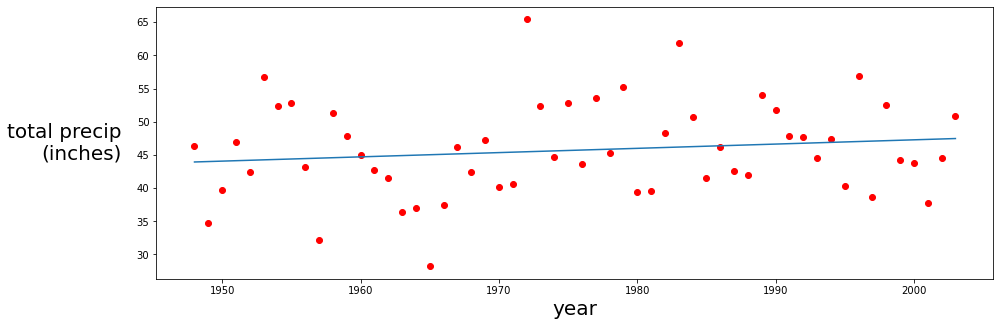

In [5]:
import matplotlib.pyplot as plt
import numpy as np

m, tercept = np.polyfit(np.float32(np.asarray(b['Year'])),np.float32(np.asarray(b1['totals (inches)'])),1)

plt.figure(figsize = (15,5))
plt.xlabel('year',fontsize=20)
plt.ylabel('total precip\n(inches)',rotation=0,labelpad=15,fontsize=20,verticalalignment='center',horizontalalignment='right')
plt.scatter(b['Year'],b1['totals (inches)'],color='red')
plt.plot(b['Year'],m*b['Year']+tercept)

Text(0.5, 0, 'year')

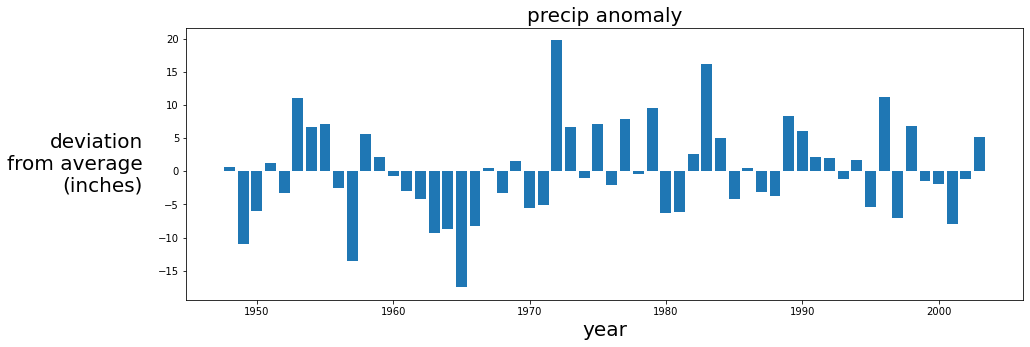

In [6]:
plt.figure(figsize=(15,5))
plt.bar(b['Year'],(b1['totals (inches)'] - b1['totals (inches)'].mean()))
plt.title('precip anomaly',fontsize=20);
plt.ylabel('deviation\nfrom average\n(inches)',rotation=0,labelpad=15,fontsize=20,verticalalignment='center',horizontalalignment='right')

plt.xlabel('year',fontsize=20)

In [10]:
y = pd.read_excel('Kingston-Temperature-1948-2018.xlsx')

y.head()

labels = ['Year',
          'January', 'February', 'March', 
          'April', 'May','June',
          'July','August','September',
          'October','November','December']

a = y[:-9]
a1 = a * (9/5) + 32

b = a.set_axis(labels, axis=1, inplace=False)
b['avg (°C)'] = b.loc[:,labels[1:]].mean(axis=1)

b1 = a1.set_axis(labels, axis=1, inplace=False)
b1['avg (°F)'] = b1.loc[:,labels[1:]].mean(axis=1)


print(f'The coolest year in Kingston was',b['Year'][b['avg (°C)'].idxmin()])
print(f'The average temp was',np.around(b['avg (°C)'].min(),2),'celsius or',np.around(b1['avg (°F)'].min(),2),'fahrenheit \n' )

print(f'The warmest year in Kingston was',b['Year'][b['avg (°C)'].idxmax()])
print(f'The average temp was',np.around(b['avg (°C)'].max(),2),'celsius or',np.around(b1['avg (°F)'].max(),2),'fahrenheit \n' )


bymonthsum = []
for i in labels[1:]:
    bymonthsum.append(b[i].sum())

minmonth = min(bymonthsum)
# print(bymonthsum.index(minmonth))
print('The coolest month by sum is',labels[1:][bymonthsum.index(minmonth)])

maxmonth = max(bymonthsum)
# print(bymonthsum.index(maxmonth))
print('The warmest month by sum is', labels[1:][bymonthsum.index(maxmonth)],'\n')

bymonthavg = []
for i in labels[1:]:
    bymonthavg.append(b[i].mean())

minmonth = min(bymonthavg)
# print(bymonthavg.index(minmonth))
print('The coolest month by avg is',labels[1:][bymonthavg.index(minmonth)])
maxmonth = max(bymonthavg)
# print(bymonthavg.index(maxmonth))
print('The warmest month by avg is',labels[1:][bymonthavg.index(maxmonth)])


The coolest year in Kingston was 1965
The average temp was 9.51 celsius or 49.13 fahrenheit 

The warmest year in Kingston was 2012
The average temp was 12.42 celsius or 54.36 fahrenheit 

The coolest month by sum is February
The warmest month by sum is August 

The coolest month by avg is February
The warmest month by avg is August


/work/albertl_uri_edu/.conda/envs/sm/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
